<a href="https://colab.research.google.com/github/Bint7bara/EnsembleLearningProject/blob/master/SurveyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns

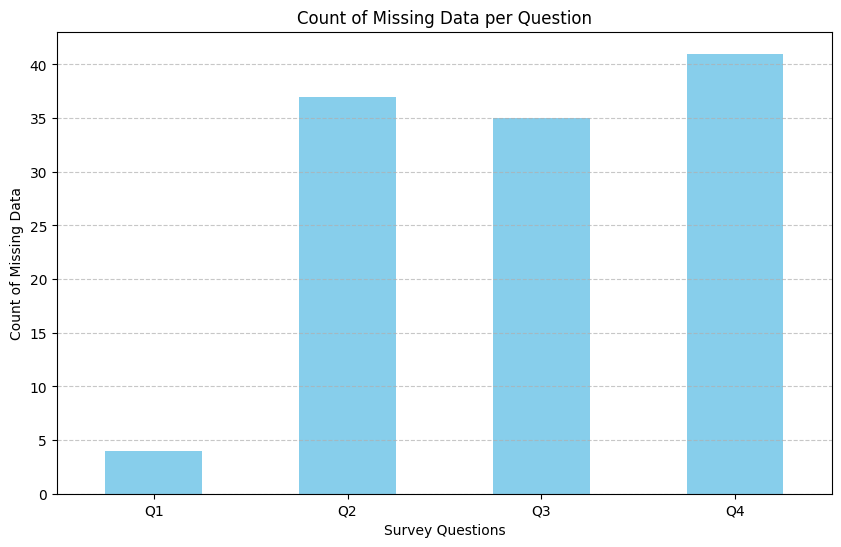

In [ ]:

# Read the file
file_path = '/content/sample_data/SurveySample.csv'
survey_data = pd.read_csv(file_path)

# Count of missing data per each question
missing_data_counts = survey_data.isna().sum()

# Plot the missing data counts
plt.figure(figsize=(10, 6))
missing_data_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Data per Question')
plt.xlabel('Survey Questions')
plt.ylabel('Count of Missing Data')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Missing Data

In [ ]:
# Check for missing data
missing_data_summary = survey_data.isnull().sum()
print(missing_data_summary)


Q1     4
Q2    37
Q3    35
Q4    41
dtype: int64


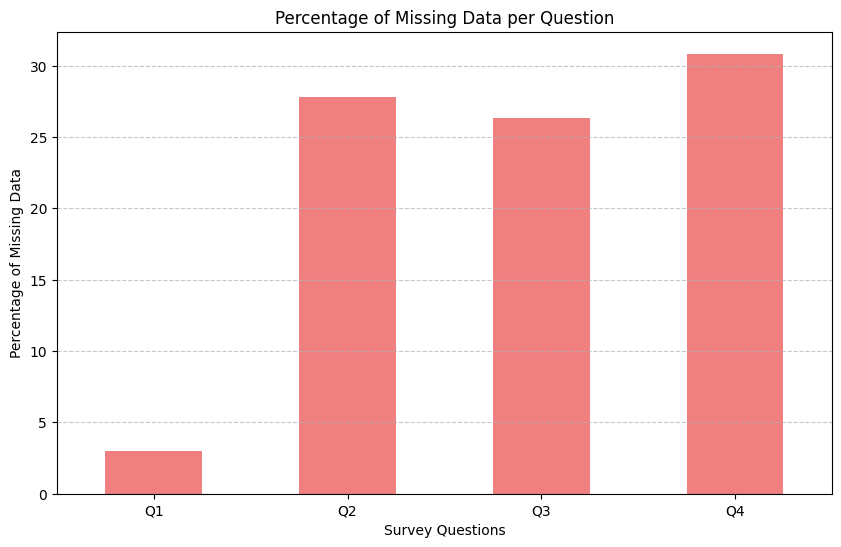

In [ ]:
# Calculate the percentage of missing data per each question
missing_data_percentages = (survey_data.isna().sum() / len(survey_data)) * 100

# Plot the percentage of missing data
plt.figure(figsize=(10, 6))
missing_data_percentages.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Missing Data per Question')
plt.xlabel('Survey Questions')
plt.ylabel('Percentage of Missing Data')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
print(missing_data_percentages)

Q1     3.007519
Q2    27.819549
Q3    26.315789
Q4    30.827068
dtype: float64


**1. Handling Missing Data**
We replace any missing data with an empty string.

In [ ]:
# Replace missing values with an empty string
survey_data = survey_data.fillna('')


**2. Text Cleaning**
We convert the text to lowercase, remove punctuation, and split into tokens.

**3. Tokenization**
This is done within the preprocess_text_basic function by splitting the text into words.

**4. Lowercasing**
Also handled within the preprocess_text_basic function by converting the text to lowercase.



**5. Remove Stop Words**
We use a predefined set of basic stopwords and remove them from the tokens.

In [ ]:
basic_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now'
])

def preprocess_text_basic(text):
    if pd.isnull(text):
        return ""
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in basic_stopwords]
    # Reconstruct the text
    return ' '.join(tokens)

# Apply preprocessing to each column
survey_data_cleaned_basic = survey_data.map(preprocess_text_basic)


**6. Lemmatization:**

Reduces a word to its base or dictionary form (lemma) based on its meaning and context.

In [ ]:

# Download required NLTK resources
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in basic_stopwords]
    # Lemmatize the tokens
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    # Reconstruct the text
    return ' '.join(lemmatized_words)

# Apply preprocessing to each column
survey_data_preprocessed = survey_data.map(preprocess_text)

# Display the preprocessed data
survey_data_preprocessed.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,Q1,Q2,Q3,Q4
0,id excited intentional targeted support social...,,aforementioned issue supporting earlystage beh...,substance use critical issue chicago midwest s...
1,educational access equity,teacher education recruitment event cps studen...,student teaching student cut back significantl...,partnering chicago public school dualenrollmen...
2,department collective concern form social just...,institute research race public policy great work,grant administration cumbersome many admin pro...,social justice scholarship student research po...
3,ability collaborate research teaching way cros...,really value studentserving program like lasur...,pace hiring revision gen ed curriculum probabl...,number physical building could use investment ...
4,,,hr process terrible civil service job posted 3...,


**7. Identify Sensitive Words or Phrases**

Ukrain, Russia, Gaza, Israel, Palestine, Jews, Muslims

In [ ]:
# Define a list of sensitive words/phrases
sensitive_words = ['ukrain', 'russia', 'gaza', 'israel', 'palestine', 'jews', 'muslims']

# Function to check for sensitive words in the text
def contains_sensitive_words(text):
    for word in sensitive_words:
        if word in text:
            return True
    return False

# Apply the function to each response and flag sensitive content
survey_data_sensitive = survey_data_preprocessed.map(contains_sensitive_words)

# Display the responses containing sensitive words
sensitive_responses = survey_data[survey_data_sensitive.any(axis=1)]
sensitive_responses


,Q1,Q2,Q3,Q4
10,My research on gender politics and training do...,The new series of talks with people like Dr. F...,antisemitism. It is so pervasive at this poin...,Training faculty and staff that they may not ...


In [ ]:
# Function to replace sensitive responses with an empty string
def replace_sensitive_responses(text):
    if contains_sensitive_words(text):
        return ""
    return text

# Apply the function to each response
survey_data_cleaned = survey_data_preprocessed.map(replace_sensitive_responses)

# Display the cleaned data
survey_data_cleaned.head()

# Save the cleaned data to a new CSV file
cleaned_file_path = 'CleanedSurveySample.csv'  # Update the file path as needed
survey_data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to CleanedSurveySample.csv


**Sentiment Analysis**


1.   Sentiment Classification:

Analyze the responses to determine the overall sentiment (positive, negative, neutral) for each question.

2.   Emotion Detection:

Identify specific emotions expressed in the responses, such as excitement, frustration, optimism, or concern.

<ipython-input-11-bf8a9046c78c>:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sentiment_analysis = cleaned_survey_data.applymap(get_sentiment)
<ipython-input-11-bf8a9046c78c>:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emotion_detection = cleaned_survey_data.applymap(detect_emotion)


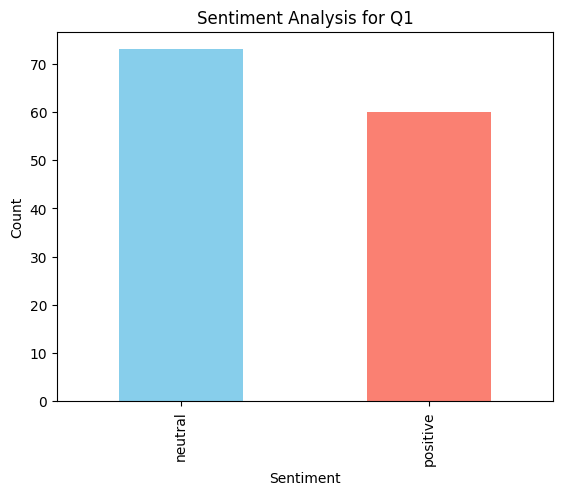

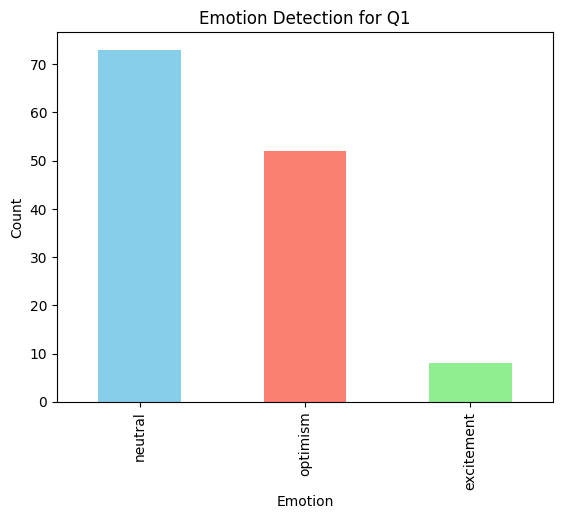

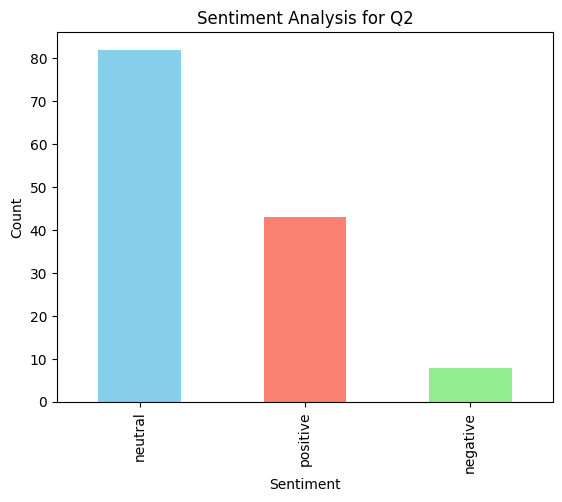

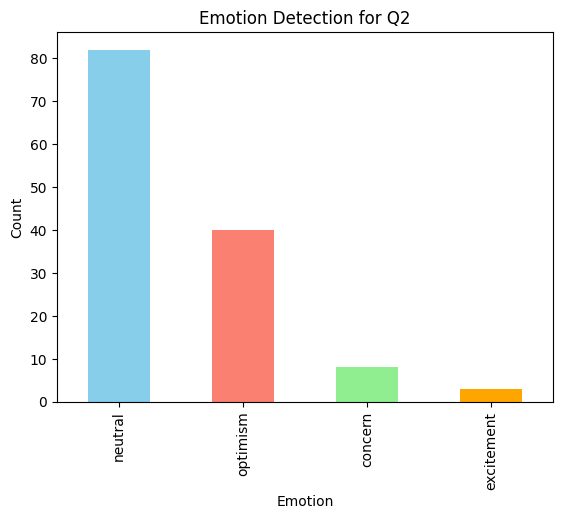

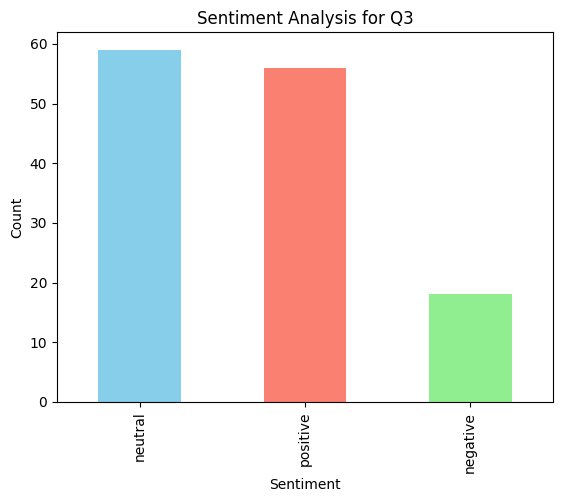

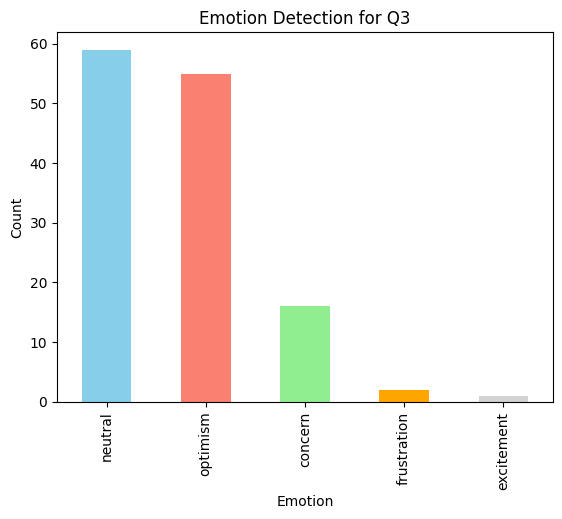

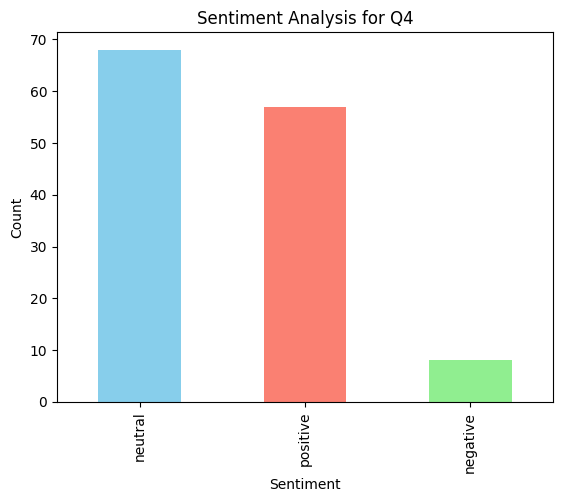

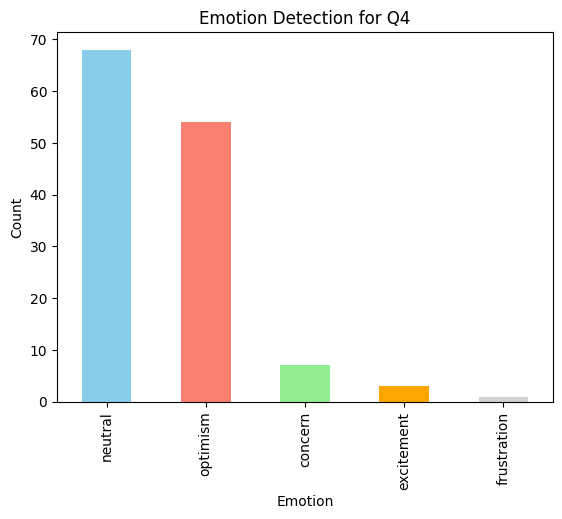

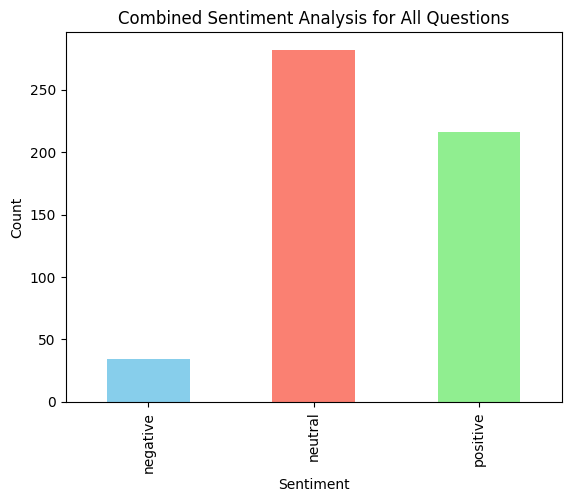

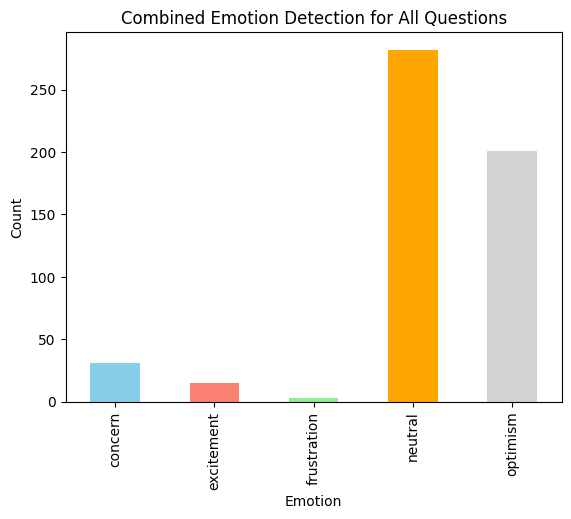

In [ ]:

# Read the cleaned data file
cleaned_file_path = 'CleanedSurveySample.csv'  # Update the path as needed
cleaned_survey_data = pd.read_csv(cleaned_file_path)

# Ensure all data is in string format
cleaned_survey_data = cleaned_survey_data.astype(str)

# Function to get the sentiment of a text
def get_sentiment(text):
    if text.strip() == "":
        return "neutral"
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

# Function to detect emotions (simplified as polarity for now)
def detect_emotion(text):
    if text.strip() == "":
        return "neutral"
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.5:
        return "excitement"
    elif polarity > 0:
        return "optimism"
    elif polarity < -0.5:
        return "frustration"
    elif polarity < 0:
        return "concern"
    else:
        return "neutral"

# Apply sentiment analysis and emotion detection
sentiment_analysis = cleaned_survey_data.applymap(get_sentiment)
emotion_detection = cleaned_survey_data.applymap(detect_emotion)

# Plot sentiment analysis results for each question
def plot_sentiment_analysis(data, question):
    sentiment_counts = data[question].value_counts()
    sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    plt.title(f'Sentiment Analysis for {question}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Plot emotion detection results for each question
def plot_emotion_detection(data, question):
    emotion_counts = data[question].value_counts()
    emotion_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange', 'lightgrey'])
    plt.title(f'Emotion Detection for {question}')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()

# Plot sentiment analysis and emotion detection for each question
for question in cleaned_survey_data.columns:
    plot_sentiment_analysis(sentiment_analysis, question)
    plot_emotion_detection(emotion_detection, question)

# Plot combined sentiment analysis for all questions
combined_sentiment = sentiment_analysis.apply(pd.Series.value_counts).sum(axis=1)
combined_sentiment.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Combined Sentiment Analysis for All Questions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot combined emotion detection for all questions
combined_emotion = emotion_detection.apply(pd.Series.value_counts).sum(axis=1)
combined_emotion.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange', 'lightgrey'])
plt.title('Combined Emotion Detection for All Questions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


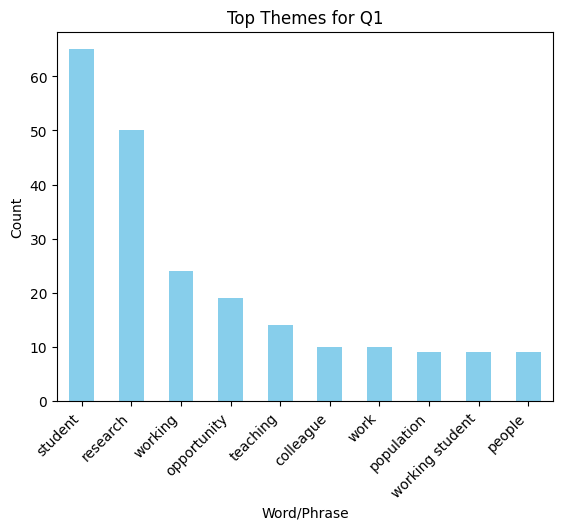

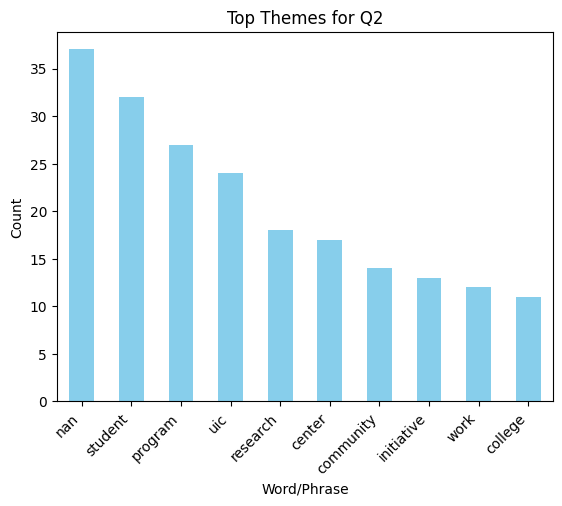

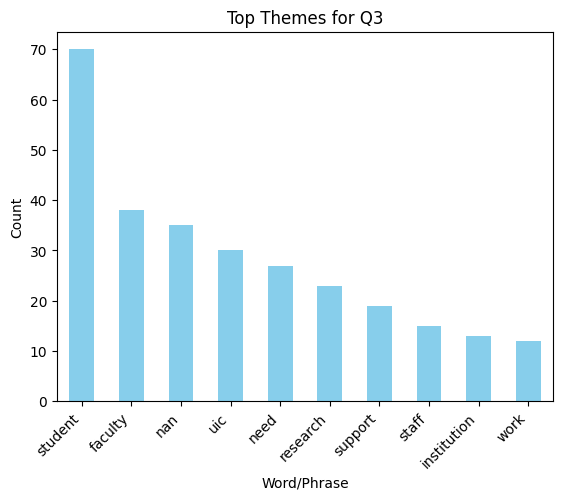

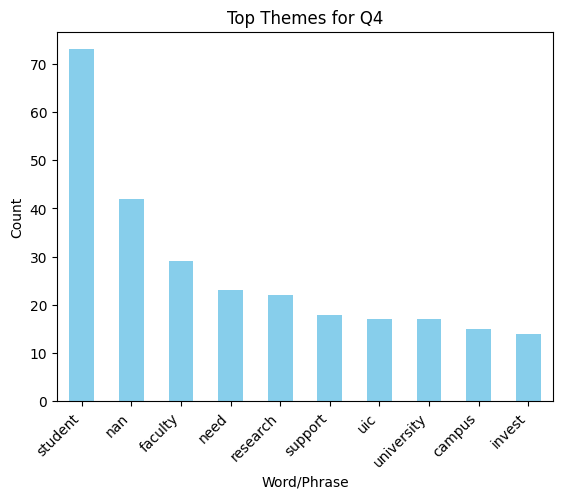

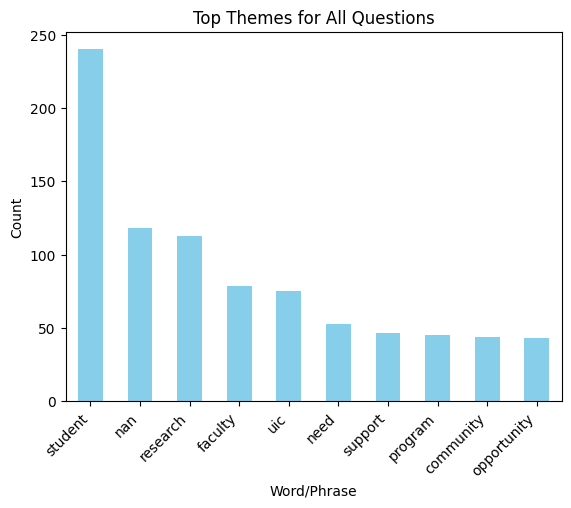

In [ ]:
# Read the cleaned data file
#cleaned_file_path = '/mnt/data/CleanedSurveySample.csv'
#cleaned_survey_data = pd.read_csv(cleaned_file_path)

# Ensure all data is in string format and remove 'nan' strings
#cleaned_survey_data = cleaned_survey_data.map(lambda x: str(x) if x != 'nan' else '')

# Function to extract themes using CountVectorizer
def extract_themes(column):
    # Create a count vectorizer to find the most common words/phrases
    vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
    text_data = column[column != ''].values  # Filter out empty strings
    X = vectorizer.fit_transform(text_data)
    # Sum up the counts of each vocabulary word
    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    word_freq = dict(zip(vocab, word_counts))
    # Get the most common words/phrases
    common_words = pd.DataFrame(word_freq.items(), columns=['Word/Phrase', 'Count']).sort_values(by='Count', ascending=False).head(10)
    return common_words

# Extract themes for each question
themes_Q1 = extract_themes(cleaned_survey_data['Q1'])
themes_Q2 = extract_themes(cleaned_survey_data['Q2'])
themes_Q3 = extract_themes(cleaned_survey_data['Q3'])
themes_Q4 = extract_themes(cleaned_survey_data['Q4'])

# Plot themes for each question
def plot_themes(themes, question):
    themes.plot(kind='bar', x='Word/Phrase', y='Count', legend=False, color='skyblue')
    plt.title(f'Top Themes for {question}')
    plt.xlabel('Word/Phrase')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot themes for each question
plot_themes(themes_Q1, 'Q1')
plot_themes(themes_Q2, 'Q2')
plot_themes(themes_Q3, 'Q3')
plot_themes(themes_Q4, 'Q4')

# Combine themes from all questions
combined_text = pd.concat([cleaned_survey_data[col] for col in ['Q1', 'Q2', 'Q3', 'Q4']]).astype(str)
combined_themes = extract_themes(combined_text)

# Plot combined themes for all questions
plot_themes(combined_themes, 'All Questions')


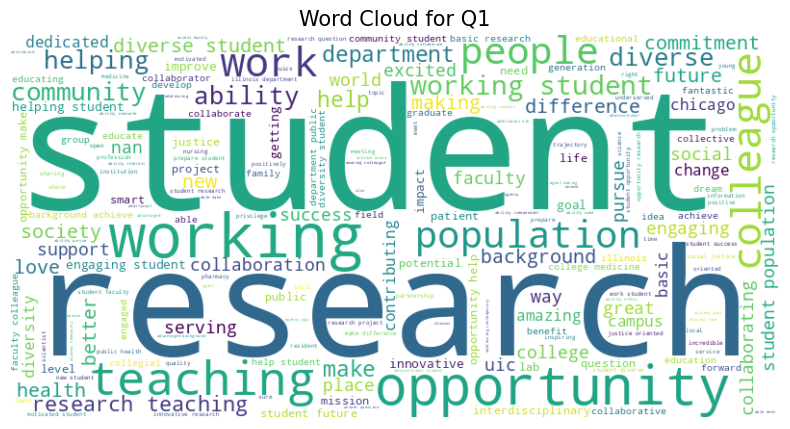

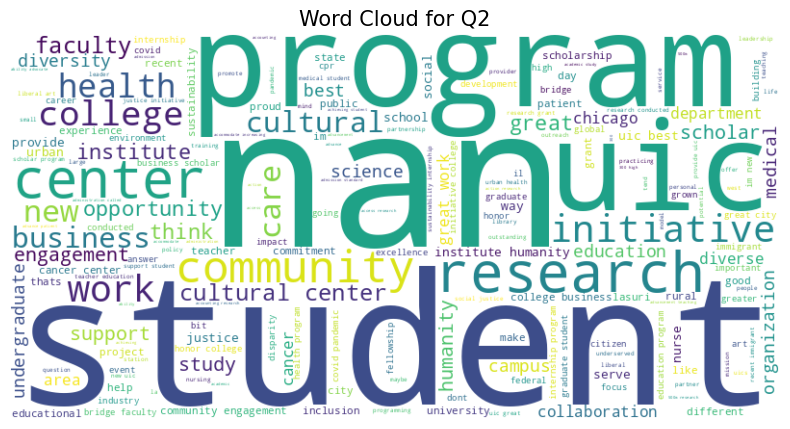

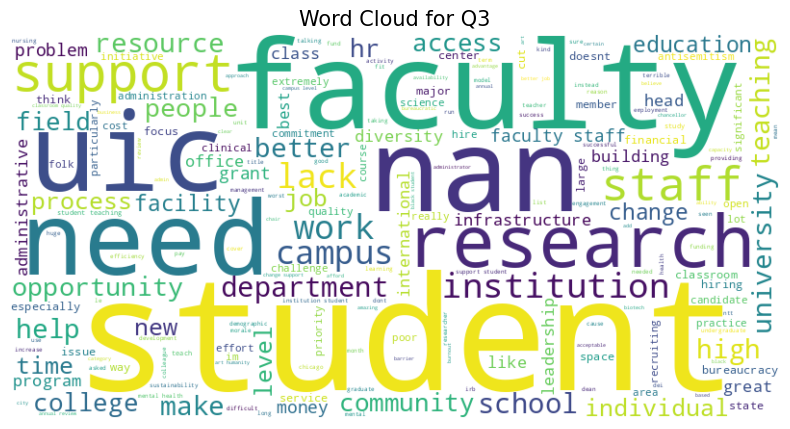

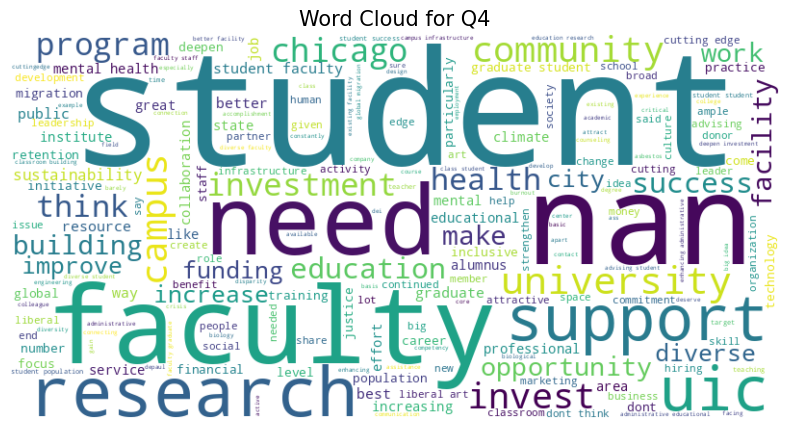

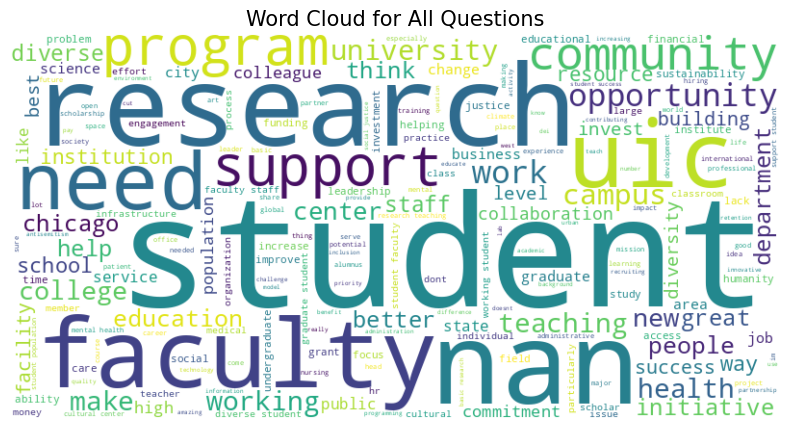

Summary for Q1:

Key Themes:
- ability: 8 mentions
- ability collaborate: 1 mentions
- ability conduct: 1 mentions
- ability effect: 1 mentions
- ability independent: 1 mentions
- ability innovate: 1 mentions
- ability interact: 1 mentions
- ability make: 1 mentions
- ability pursue: 1 mentions
- able: 2 mentions
- able make: 1 mentions
- able meet: 1 mentions
- access: 1 mentions
- access equity: 1 mentions
- achieve: 2 mentions
- achieve dream: 1 mentions
- achieve goal: 1 mentions
- additional: 1 mentions
- additional nih: 1 mentions
- addressing: 1 mentions
- addressing contemporary: 1 mentions
- administrator: 1 mentions
- administrator student: 1 mentions
- advantaged: 1 mentions
- advantaged background: 1 mentions
- agency: 1 mentions
- agency ngo: 1 mentions
- agent: 1 mentions
- agent making: 1 mentions
- alon: 1 mentions
- alumnus: 1 mentions
- alumnus community: 1 mentions
- amazing: 3 mentions
- amazing colleague: 1 mentions
- amazing team: 1 mentions
- answer: 1 mentions
-

In [ ]:

# Read the cleaned data file
#cleaned_file_path = 'CleanedSurveySample.csv'  # Update the path as needed
#cleaned_survey_data = pd.read_csv(cleaned_file_path)

# Ensure all data is in string format and remove 'nan' strings
#cleaned_survey_data = cleaned_survey_data.map(lambda x: str(x) if x != 'nan' else '')

# Function to extract themes using CountVectorizer
def extract_themes(column):
    # Create a count vectorizer to find the most common words/phrases
    vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
    text_data = column[column != ''].values  # Filter out empty strings
    X = vectorizer.fit_transform(text_data)
    # Sum up the counts of each vocabulary word
    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    word_freq = dict(zip(vocab, word_counts))
    return word_freq

# Function to generate word cloud
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# Generate and plot word clouds for each question
themes_Q1 = extract_themes(cleaned_survey_data['Q1'])
generate_wordcloud(themes_Q1, 'Word Cloud for Q1')

themes_Q2 = extract_themes(cleaned_survey_data['Q2'])
generate_wordcloud(themes_Q2, 'Word Cloud for Q2')

themes_Q3 = extract_themes(cleaned_survey_data['Q3'])
generate_wordcloud(themes_Q3, 'Word Cloud for Q3')

themes_Q4 = extract_themes(cleaned_survey_data['Q4'])
generate_wordcloud(themes_Q4, 'Word Cloud for Q4')

# Combine themes from all questions
combined_text = pd.concat([cleaned_survey_data[col] for col in ['Q1', 'Q2', 'Q3', 'Q4']]).astype(str)
combined_themes = extract_themes(combined_text)

# Generate and plot word cloud for all questions combined
generate_wordcloud(combined_themes, 'Word Cloud for All Questions')

# Summarize the key sentiments and themes with direct quotes
def summarize_themes(data, question):
    quotes = data[question][data[question] != ''].sample(3).values
    summary = f"Summary for {question}:\n"
    summary += "\nKey Themes:\n"
    for word, count in extract_themes(data[question]).items():
        summary += f"- {word}: {count} mentions\n"
    summary += "\nSample Quotes:\n"
    for quote in quotes:
        summary += f"  - \"{quote}\"\n"
    return summary

# Generate summary report
report = ""
for question in ['Q1', 'Q2', 'Q3', 'Q4']:
    report += summarize_themes(cleaned_survey_data, question)
    report += "\n"

# Print the summary report
print(report)


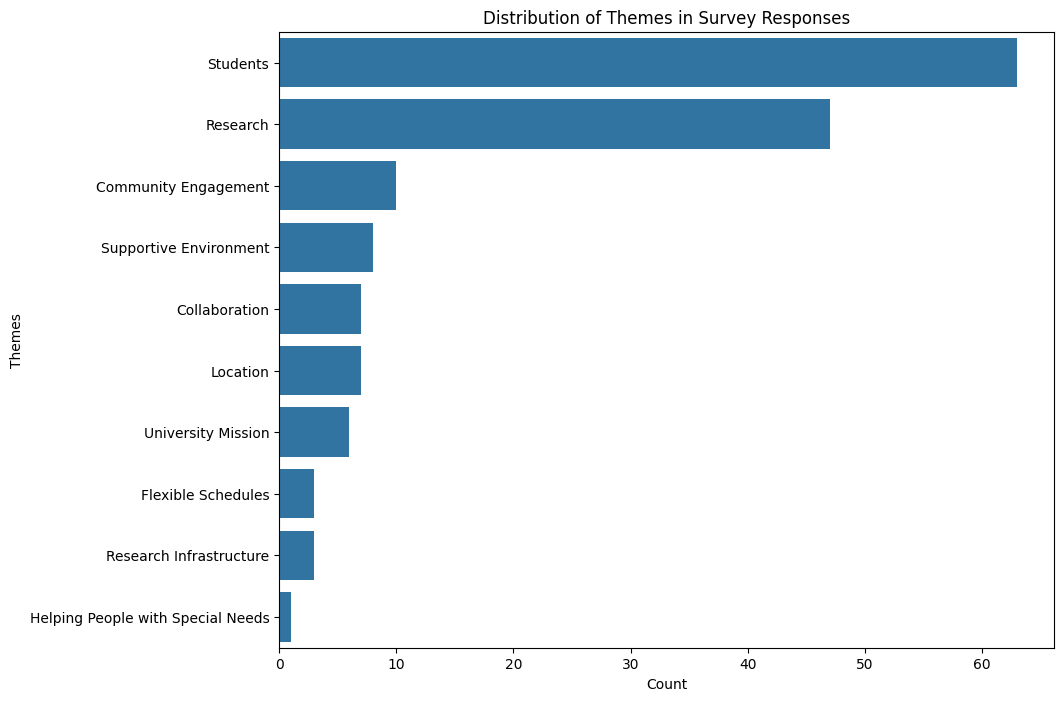

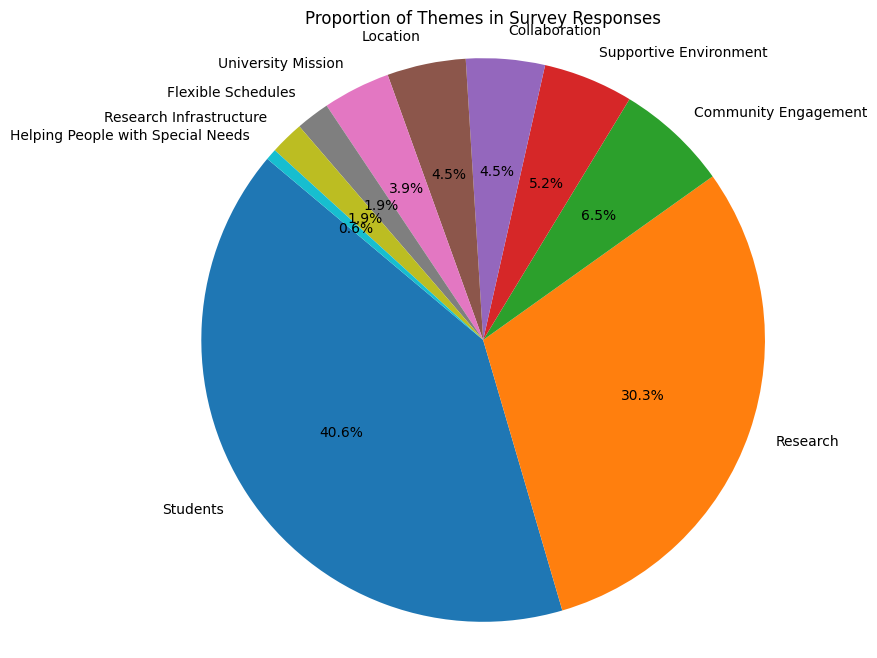

In [ ]:

# Function to normalize text
def normalize_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()  # Convert to lower case
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Function to tag response with themes
def tag_response(response, themes):
    tagged_themes = []
    for theme, keywords in themes.items():
        if any(keyword in response for keyword in keywords):
            tagged_themes.append(theme)
    return tagged_themes

# Load the survey data
data_path = '/content/sample_data/SurveySample.csv'  # Make sure to update this path
survey_data = pd.read_csv(data_path)

# Normalize the responses in Q1
survey_data['Q1'] = survey_data['Q1'].apply(normalize_text)

# Define themes and associated keywords
themes = {
    "Students": ["student", "students", "undergraduate", "graduate"],
    "Research": ["research", "study", "studies"],
    "Collaboration": ["collaborate", "collaboration", "teamwork", "partner"],
    "Community Engagement": ["community", "engagement", "outreach", "public"],
    "University Mission": ["mission", "goal", "objectives"],
    "Location": ["location", "campus", "site", "place"],
    "Personal Growth": ["growth", "development", "personal"],
    "Supportive Environment": ["support", "environment", "care", "encourage"],
    "Flexible Schedules": ["flexible", "schedule", "timing", "time"],
    "Research Infrastructure": ["infrastructure", "facilities", "resources", "equipment"],
    "Helping People with Special Needs": ["special needs", "disabilities", "accessible", "accessibility"]
}

# Tag each response with relevant themes
survey_data['Tagged Themes'] = survey_data['Q1'].apply(lambda x: tag_response(x, themes))

# Flatten the list of lists and count occurrences of each theme
theme_counts = Counter([theme for sublist in survey_data['Tagged Themes'] for theme in sublist])

# Convert to DataFrame for better visualization and sorting
theme_counts_df = pd.DataFrame(list(theme_counts.items()), columns=['Theme', 'Count'])
theme_counts_df.sort_values('Count', ascending=False, inplace=True)

# Bar plot for theme distribution
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Theme', data=theme_counts_df)
plt.title('Distribution of Themes in Survey Responses')
plt.xlabel('Count')
plt.ylabel('Themes')
plt.show()

# Pie chart for theme proportions
plt.figure(figsize=(8, 8))
plt.pie(theme_counts_df['Count'], labels=theme_counts_df['Theme'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Themes in Survey Responses')
plt.show()


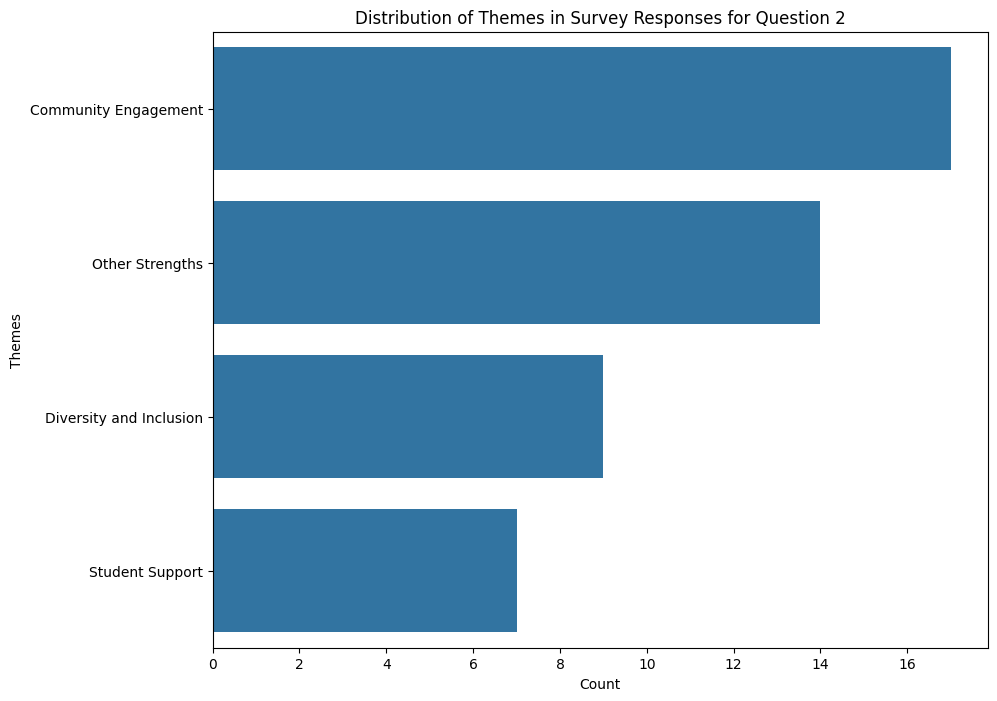

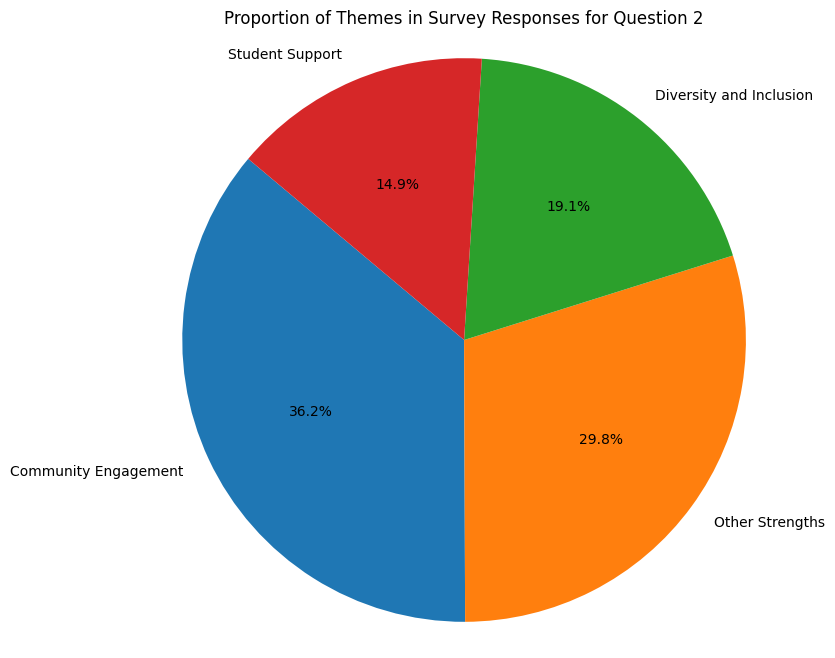

In [ ]:

# Load the survey data
#data_path = '/content/sample_data/SurveySample.csv'  # Make sure to update this path
#survey_data = pd.read_csv(data_path)

# Normalize the responses in Q2
survey_data['Q2'] = survey_data['Q2'].apply(normalize_text)

# Define themes and associated keywords
themes = {
    "Community Engagement": ["community", "engagement", "outreach", "public"],
    "Diversity and Inclusion": ["diversity", "inclusion", "inclusive", "diverse"],
    "Student Support": ["support", "student support", "student services", "guidance"],
    "Research Excellence": ["research excellence", "leading research", "research leader", "research quality"],
    "Other Strengths": ["sustainability internship", "covid", "pandemic", "honors college", "undergraduate research", "social justice", "humanities", "great faculty"]
}

# Tag each response with relevant themes
survey_data['Tagged Themes Q2'] = survey_data['Q2'].apply(lambda x: tag_response(x, themes))

# Flatten the list of lists and count occurrences of each theme
theme_counts = Counter([theme for sublist in survey_data['Tagged Themes Q2'] for theme in sublist])

# Convert to DataFrame for better visualization and sorting
theme_counts_df = pd.DataFrame(list(theme_counts.items()), columns=['Theme', 'Count'])
theme_counts_df.sort_values('Count', ascending=False, inplace=True)

# Bar plot for theme distribution
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Theme', data=theme_counts_df)
plt.title('Distribution of Themes in Survey Responses for Question 2')
plt.xlabel('Count')
plt.ylabel('Themes')
plt.show()

# Pie chart for theme proportions
plt.figure(figsize=(8, 8))
plt.pie(theme_counts_df['Count'], labels=theme_counts_df['Theme'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Themes in Survey Responses for Question 2')
plt.show()


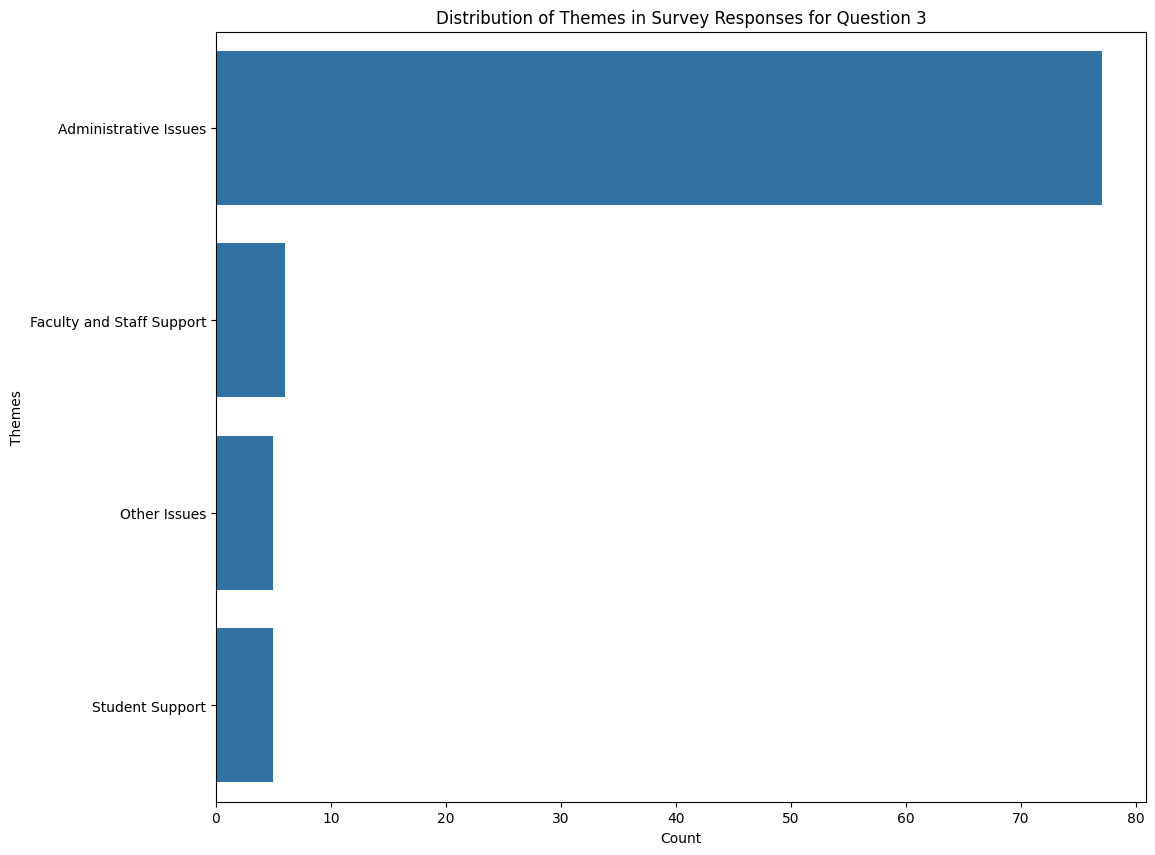

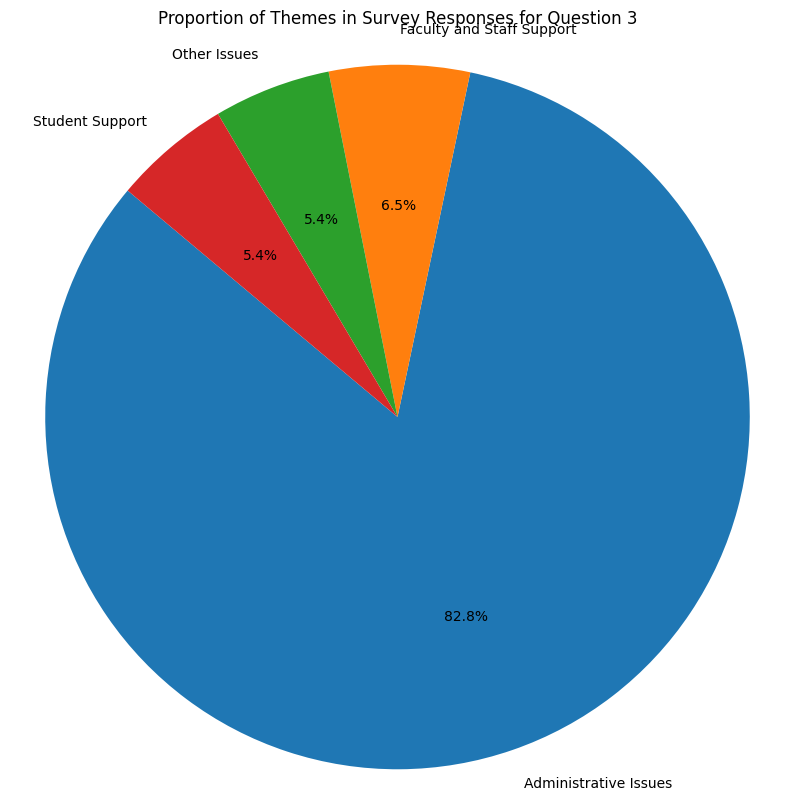

In [ ]:


# Load the survey data
#data_path = '/content/sample_data/SurveySample.csv'  # Make sure to update this path
#survey_data = pd.read_csv(data_path)

# Normalize the responses in Q3
survey_data['Q3'] = survey_data['Q3'].apply(normalize_text)

# Define themes and associated keywords
themes = {
    "Administrative Issues": ["delays", "cumbersome", "unresponsive", "hr", "irb", "it", "physical plant services", "communication issues", "disconnect", "lack of platform", "staff shortages", "bottlenecks"],
    "Faculty and Staff Support": ["low morale", "burnout", "low salaries", "heavy workloads", "lack of recognition", "unfair treatment", "discrimination", "nepotism", "ntt faculty"],
    "Student Support": ["financial hardship", "housing", "food insecurity", "mental health", "diverse student body", "underrepresentation", "access to resources"],
    "Research and Innovation": ["grant administration", "infrastructure limitations", "outdated facilities", "collaboration barriers"],
    "Other Issues": ["safety and security", "antisemitism", "sustainability", "budgetary concerns"]
}

# Tag each response with relevant themes
survey_data['Tagged Themes Q3'] = survey_data['Q3'].apply(lambda x: tag_response(x, themes))

# Flatten the list of lists and count occurrences of each theme
theme_counts = Counter([theme for sublist in survey_data['Tagged Themes Q3'] for theme in sublist])

# Convert to DataFrame for better visualization and sorting
theme_counts_df = pd.DataFrame(list(theme_counts.items()), columns=['Theme', 'Count'])
theme_counts_df.sort_values('Count', ascending=False, inplace=True)

# Bar plot for theme distribution
plt.figure(figsize=(12, 10))
sns.barplot(x='Count', y='Theme', data=theme_counts_df)
plt.title('Distribution of Themes in Survey Responses for Question 3')
plt.xlabel('Count')
plt.ylabel('Themes')
plt.show()

# Pie chart for theme proportions
plt.figure(figsize=(10, 10))
plt.pie(theme_counts_df['Count'], labels=theme_counts_df['Theme'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Themes in Survey Responses for Question 3')
plt.show()


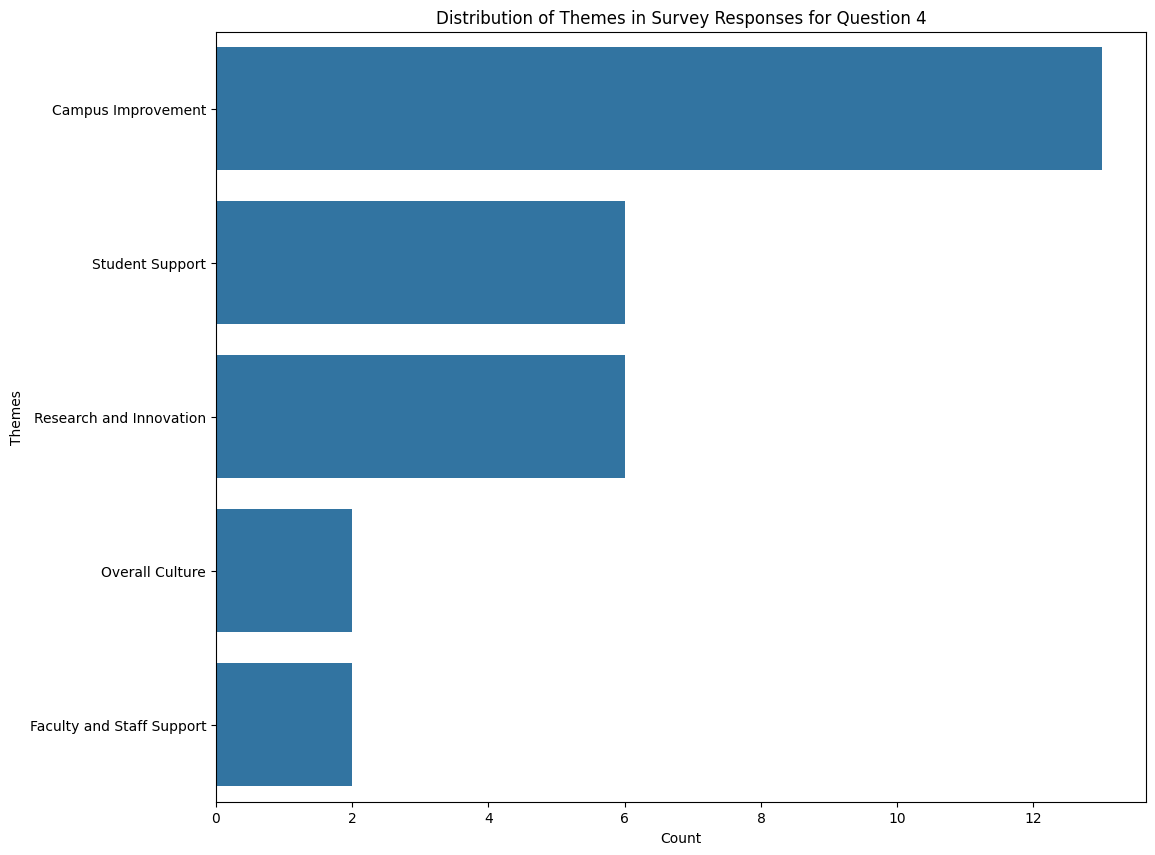

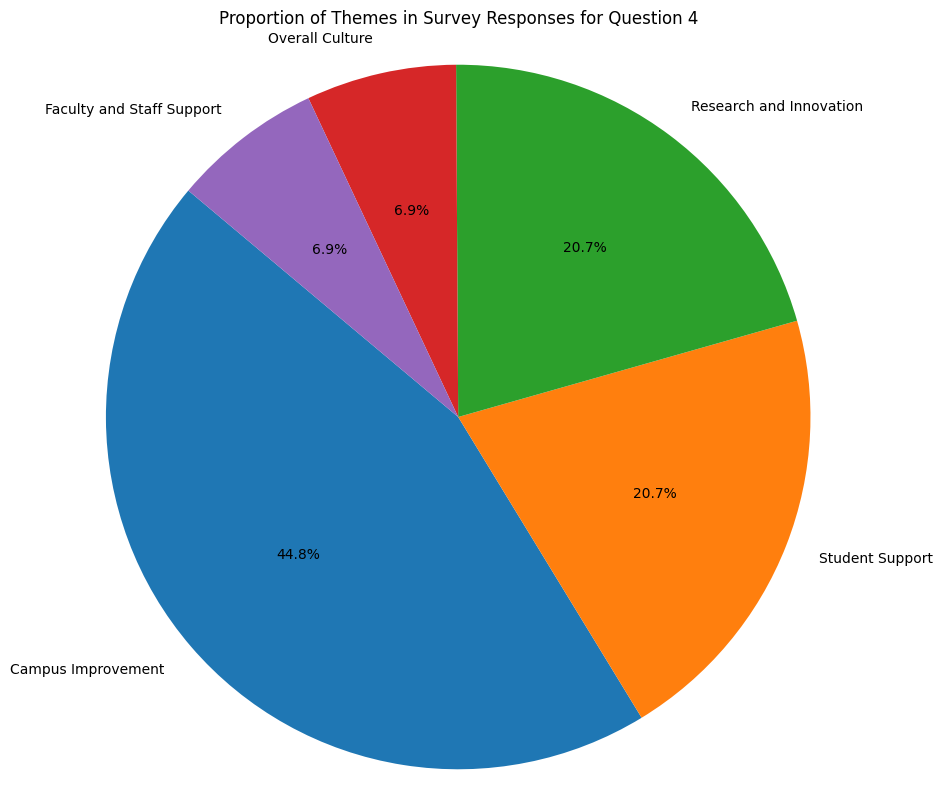

In [ ]:

# Load the survey data
#data_path = '/content/sample_data/SurveySample.csv'  # Make sure to update this path
#survey_data = pd.read_csv(data_path)

# Normalize the responses in Q4
survey_data['Q4'] = survey_data['Q4'].apply(normalize_text)

# Define themes and associated keywords
themes = {
    "Student Support": ["financial aid", "scholarships", "grants", "mental health", "academic success", "career development"],
    "Faculty and Staff Support": ["competitive compensation", "work-life balance", "diversity equity inclusion", "professional development"],
    "Research and Innovation": ["research infrastructure", "grant support", "collaboration", "focus areas"],
    "Campus Improvement": ["facilities", "safety and security", "sustainability", "community engagement"],
    "Overall Culture": ["transparency", "communication", "recognition", "appreciation", "teaching and learning", "data-driven decision making"]
}

# Tag each response with relevant themes
survey_data['Tagged Themes Q4'] = survey_data['Q4'].apply(lambda x: tag_response(x, themes))

# Flatten the list of lists and count occurrences of each theme
theme_counts = Counter([theme for sublist in survey_data['Tagged Themes Q4'] for theme in sublist])

# Convert to DataFrame for better visualization and sorting
theme_counts_df = pd.DataFrame(list(theme_counts.items()), columns=['Theme', 'Count'])
theme_counts_df.sort_values('Count', ascending=False, inplace=True)

# Bar plot for theme distribution
plt.figure(figsize=(12, 10))
sns.barplot(x='Count', y='Theme', data=theme_counts_df)
plt.title('Distribution of Themes in Survey Responses for Question 4')
plt.xlabel('Count')
plt.ylabel('Themes')
plt.show()

# Pie chart for theme proportions
plt.figure(figsize=(10, 10))
plt.pie(theme_counts_df['Count'], labels=theme_counts_df['Theme'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Themes in Survey Responses for Question 4')
plt.show()


# New Section